For the BaggingClassifier() method, perform similar calculations as in class (crosvalidation with GridSearchCV() for 2, 5, 10, 20, 30, 50, and 100 classifiers), but use knn as the base classifier. The optimal value of the nn parameter should be found using grid search. The iris set should be used.

In [1]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn import metrics

1. iris dataset

In [2]:
iris= datasets.load_iris()
X=iris.data
y=iris.target

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

2. clf score for nn=1

In [5]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train);
full_test = clf.score(X_test, y_test)
print("nn=1 PU:", full_test)

nn=1 PU: 0.9736842105263158


3. looking for optimal nn value

In [6]:
param_grid = {'n_neighbors': range(2, 22)}
clf = KNeighborsClassifier()
clf_grid = GridSearchCV(clf, param_grid)
clf_grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 22)})

Text(0, 0.5, 'classifier result')

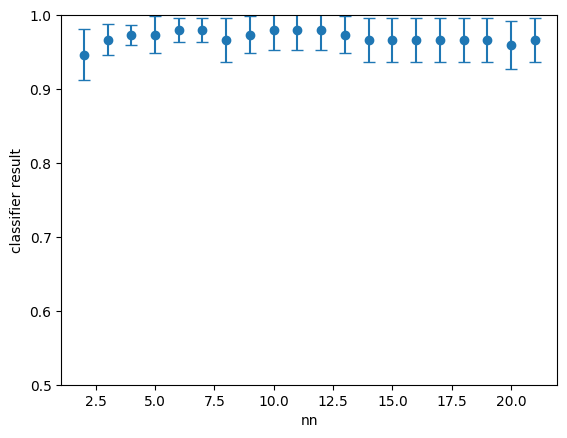

In [8]:
plt.errorbar(param_grid["n_neighbors"], clf_grid.cv_results_["mean_test_score"], clf_grid.cv_results_["std_test_score"], fmt="o", capsize=4)
plt.ylim(0.5, 1)
plt.xlabel('nn')
plt.ylabel('classifier result')

In [10]:
print(clf_grid.best_params_, clf_grid.best_score_)

clf_opt = KNeighborsClassifier(n_neighbors = 6)
clf_opt.fit(X_train, y_train)
opt_test = clf_opt.score(X_test, y_test)
print("Chosen knn:", opt_test)

{'n_neighbors': 6} 0.9800000000000001
Chosen knn: 0.9736842105263158


4. Bagging using knn

In [11]:
grid_params = {"n_estimators": [2, 5, 10, 20, 30, 50,100,]}
clf_bag = BaggingClassifier(KNeighborsClassifier(n_neighbors = 6))
clf_bag_grid = GridSearchCV(clf_bag, grid_params)
clf_bag_grid.fit(X, y);

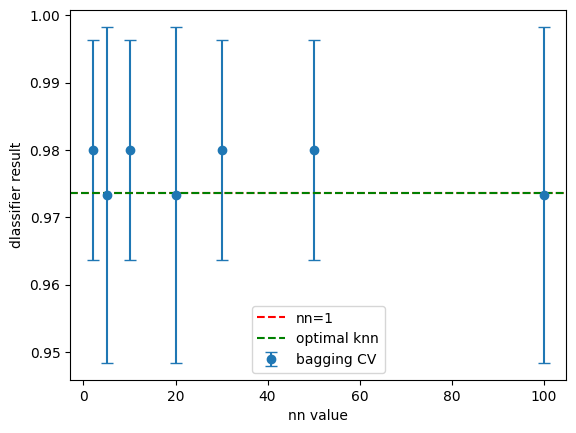

In [13]:
plt.errorbar(grid_params["n_estimators"], clf_bag_grid.cv_results_["mean_test_score"], clf_bag_grid.cv_results_["std_test_score"], fmt="o", capsize=4, label = "bagging CV");
plt.axhline(full_test, ls = "--", color = "red", label = "nn=1")
plt.axhline(opt_test, ls = "--", color = "green", label = "optimal knn")
plt.ylabel('dlassifier result')
plt.xlabel('nn value')
plt.legend()